# Perkenalan

Nama : Pramudya Adi Nugraha

Batch : 10

Dataset : Rain in Australia

Objective :
- Mampu memahami konsep Classification dengan Logistic Regression dan SVM
- Mampu mempersiapkan data untuk digunakan dalam model Logistic Regression dan SVM
- Mampu mengimplementasikan Logistic Regression dan SVM untuk membuat prediksi

# Import Libraries

In [75]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer, OneHotEncoder
import scipy.stats as stats
from scipy.stats import norm
from feature_engine.outliers import OutlierTrimmer
from feature_engine.imputation import MeanMedianImputer, CategoricalImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay
from sklearn.svm import LinearSVC, SVC
import warnings
warnings.filterwarnings('ignore')

# Data Loading

In [2]:
# Load Dataset 

data = pd.read_csv('weatherAUS.csv')
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [3]:
# Melihat 5 data teratas

data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
# Duplicate Dataset

data_copy = data.copy()

In [5]:
# Check Dataset Info

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [6]:
# Check dataset column

data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [7]:
# Dataset describe

data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


# Exploratory Data Analysis (EDA)

In [8]:
# mencari tahu shape dari dataset

data.shape

(145460, 23)

In [9]:
# mencari tahu jumlah missing data pada masing-masing kolom

data_miss = data.isnull().sum()
data_miss.sort_values()

Date                 0
Location             0
MaxTemp           1261
MinTemp           1485
Temp9am           1767
WindSpeed9am      1767
Humidity9am       2654
WindSpeed3pm      3062
Rainfall          3261
RainToday         3261
RainTomorrow      3267
Temp3pm           3609
WindDir3pm        4228
Humidity3pm       4507
WindGustSpeed    10263
WindGustDir      10326
WindDir9am       10566
Pressure3pm      15028
Pressure9am      15065
Cloud9am         55888
Cloud3pm         59358
Evaporation      62790
Sunshine         69835
dtype: int64

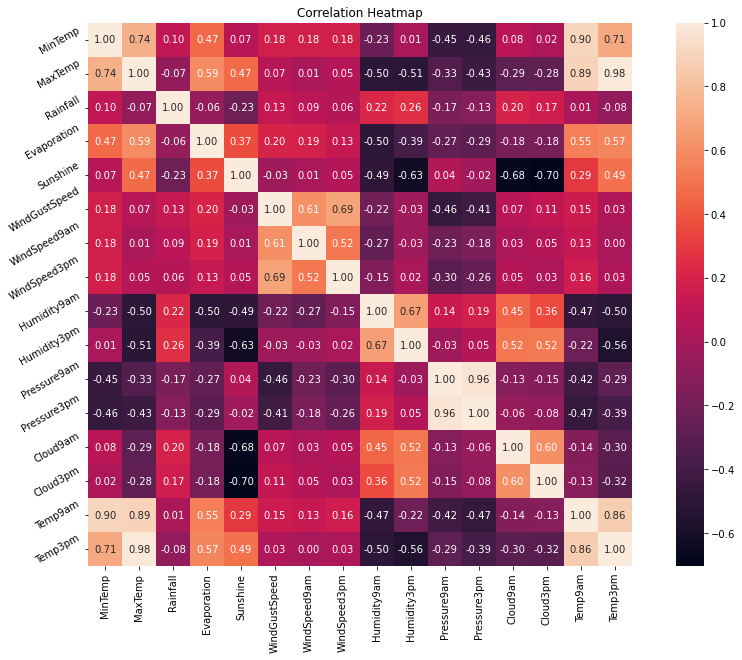

In [10]:
# mencari tahu hubungan antar column pada datset dengan menggunakan heatmap 

correlation = data.corr()

plt.figure(figsize=(16,10))
plt.title('Correlation Heatmap')
ax = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)           
plt.show()

In [11]:
# Mencari tahu tabel yang memiliki bentuk numerical dan catagorical

data_num = data.select_dtypes(include= np.number).columns.tolist()
data_cat = data.select_dtypes(include=['object']).columns.tolist()

print('Kolom bertype numeric pada dataset :', data_num)
print('Kolom bertype catagorical pada dataset :', data_cat)

Kolom bertype numeric pada dataset : ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']
Kolom bertype catagorical pada dataset : ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [12]:
# Check missing value in RainTomorrow Column

data['RainTomorrow'].isnull().sum()

3267

In [13]:
# Check unique values in RainTomorrow Column

data['RainTomorrow'].unique()

array(['No', 'Yes', nan], dtype=object)

In [14]:
# Frekuensi distribusi value pada kolom `RainTomorrow`

data['RainTomorrow'].value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

In [15]:
# Frekuensi distribusi value pada kolom `RainTomorrow` dalam persentase

data['RainTomorrow'].value_counts()/len(data) * 100

No     75.839406
Yes    21.914616
Name: RainTomorrow, dtype: float64

In [16]:
# Persentase perbandindingan data tidak missing dengan data missing pada kolom `RainTomorrow`

print('Presentase data tidak NaN : ', data['RainTomorrow'].value_counts().sum()/len(data)*100)
print('Persentase data NaN : ', data['RainTomorrow'].isnull().sum()/len(data)*100)

Presentase data tidak NaN :  97.75402172418535
Persentase data NaN :  2.245978275814657


# Data Preprocessing

In [17]:
# Karena terdapat missing value pada coloumn `RainTomorrow`, maka akan dilakukan drop terhadap data yang missing tersebut

data_new = data.dropna(subset= ['RainTomorrow'])
data_new

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,No
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No


In [18]:
# Dilakukan perubahan bentuk pada kolom `RainTomorrow` dari catagorical menjadi numerical

data_new['RainTomorrow'] = data['RainTomorrow'].map({'No' : 0,
                                                     'Yes' : 1})
data_new['RainTomorrow'].value_counts()

0.0    110316
1.0     31877
Name: RainTomorrow, dtype: int64

In [19]:
# Akan dilakukan drop terhadap column `Date` dan `Location`
# Karena prediksi yang akan dilakukan untuk mencari tahu apakah akan terjadi hujan esok hari di Australi
# Sehingga kedua tabel tersebut tidak ada kaitannya

data_new.drop(columns= ['Date', 'Location'], axis= 1, inplace= True)

In [20]:
# Get Data for Model Inference

data_inf = data_new.sample(10, random_state=18)
data_inf_clear = data_inf.dropna()
data_inf_clear

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
132026,10.8,16.5,2.4,2.6,5.8,NNW,41.0,E,SE,13.0,...,74.0,45.0,1013.5,1012.0,4.0,7.0,12.8,16.3,Yes,0.0
137958,12.4,16.9,12.0,7.0,3.5,SSE,33.0,SE,SE,17.0,...,72.0,74.0,1020.5,1017.9,4.0,8.0,15.0,15.9,Yes,0.0
94900,11.5,26.1,0.0,7.0,10.5,NNE,30.0,N,NE,2.0,...,68.0,44.0,1020.1,1016.4,1.0,1.0,20.9,24.7,No,0.0
23166,15.3,21.2,0.0,6.6,7.3,E,50.0,E,ENE,30.0,...,59.0,67.0,1020.6,1018.6,6.0,7.0,20.0,18.7,No,0.0
67265,5.4,18.5,0.0,3.0,6.5,SSE,30.0,N,ESE,4.0,...,78.0,43.0,1034.4,1029.2,7.0,3.0,7.5,17.8,No,0.0
85233,16.9,27.5,2.4,3.8,10.8,E,24.0,SSE,E,9.0,...,58.0,62.0,1012.5,1010.5,4.0,7.0,24.9,25.4,Yes,1.0
95210,16.6,26.9,0.0,4.6,10.4,ESE,39.0,SE,E,17.0,...,65.0,60.0,1015.0,1012.6,2.0,2.0,23.0,26.0,No,0.0


In [21]:
# Remove Inference-Set from Dataset

data_new = data_new.drop(data_inf_clear.index)
data_new

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0
1,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0
2,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0
3,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,0.0
4,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,E,15.0,...,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0
145455,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0
145456,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0
145457,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0


In [22]:
# Reset Index

data_new.reset_index(drop=True, inplace=True)
data_inf_clear.reset_index(drop=True, inplace=True)
data_inf_clear

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,10.8,16.5,2.4,2.6,5.8,NNW,41.0,E,SE,13.0,...,74.0,45.0,1013.5,1012.0,4.0,7.0,12.8,16.3,Yes,0.0
1,12.4,16.9,12.0,7.0,3.5,SSE,33.0,SE,SE,17.0,...,72.0,74.0,1020.5,1017.9,4.0,8.0,15.0,15.9,Yes,0.0
2,11.5,26.1,0.0,7.0,10.5,NNE,30.0,N,NE,2.0,...,68.0,44.0,1020.1,1016.4,1.0,1.0,20.9,24.7,No,0.0
3,15.3,21.2,0.0,6.6,7.3,E,50.0,E,ENE,30.0,...,59.0,67.0,1020.6,1018.6,6.0,7.0,20.0,18.7,No,0.0
4,5.4,18.5,0.0,3.0,6.5,SSE,30.0,N,ESE,4.0,...,78.0,43.0,1034.4,1029.2,7.0,3.0,7.5,17.8,No,0.0
5,16.9,27.5,2.4,3.8,10.8,E,24.0,SSE,E,9.0,...,58.0,62.0,1012.5,1010.5,4.0,7.0,24.9,25.4,Yes,1.0
6,16.6,26.9,0.0,4.6,10.4,ESE,39.0,SE,E,17.0,...,65.0,60.0,1015.0,1012.6,2.0,2.0,23.0,26.0,No,0.0


## Splitting Dataset

In [23]:
# Split between X (features) and y (target)

X = data_new.drop('RainTomorrow', axis=1)
y = data_new['RainTomorrow']
X

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No
1,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No
2,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No
3,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No
4,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142181,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No
142182,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No
142183,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No
142184,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No


In [24]:
y

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
142181    0.0
142182    0.0
142183    0.0
142184    0.0
142185    0.0
Name: RainTomorrow, Length: 142186, dtype: float64

In [25]:
# Split between Train-Set and Test-Set


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=18)

print('X Train Size : ', X_train.shape)
print('X Test Size  : ', X_test.shape)
print('y Train Size : ', y_train.shape)
print('y Test Size  : ', y_test.shape)

X Train Size :  (113748, 20)
X Test Size  :  (28438, 20)
y Train Size :  (113748,)
y Test Size  :  (28438,)


---
## Handling Outlier

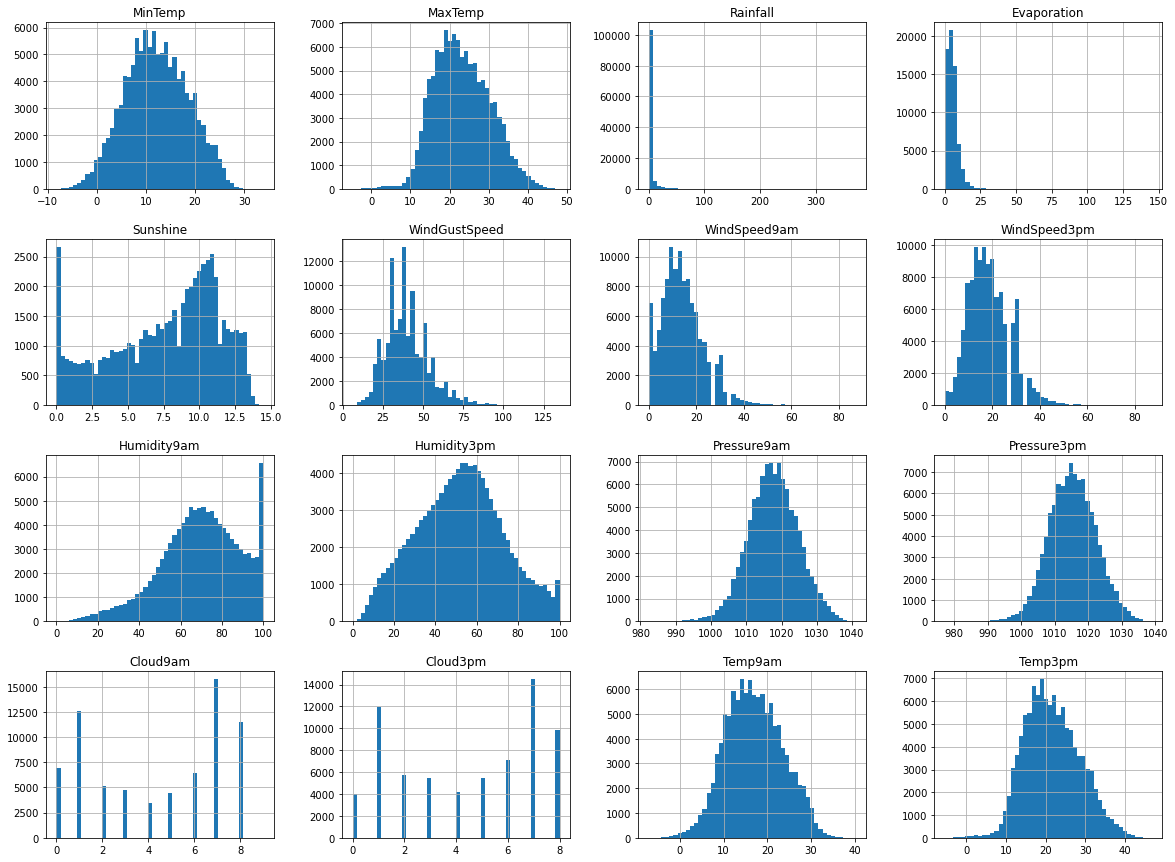

In [26]:
# Mencari tahu distribusi data dan visualisasi

X_train.hist(bins=50, figsize=(20,15))
plt.show()

In [27]:
def skew_func (data, column):
    skewness = data[column].skew(axis = 0, skipna = True)
    print(f'Skewness of {column} = ', skewness)

In [28]:
num_columns = X_train.select_dtypes(include= np.number).columns.tolist()

In [29]:
for column in num_columns:
    skew_func(data, column)

Skewness of MinTemp =  0.021188284011150468
Skewness of MaxTemp =  0.22083934813407782
Skewness of Rainfall =  9.83622525039533
Skewness of Evaporation =  3.7612860111420643
Skewness of Sunshine =  -0.4964800381328167
Skewness of WindGustSpeed =  0.8748788780303394
Skewness of WindSpeed9am =  0.7776295122810298
Skewness of WindSpeed3pm =  0.6282154194116664
Skewness of Humidity9am =  -0.48396899459793047
Skewness of Humidity3pm =  0.03361436764166918
Skewness of Pressure9am =  -0.09552363669451734
Skewness of Pressure3pm =  -0.04562140480119886
Skewness of Cloud9am =  -0.229081832248417
Skewness of Cloud3pm =  -0.22638434607149094
Skewness of Temp9am =  0.08853999659506906
Skewness of Temp3pm =  0.2379603639909972


In [30]:
def outiers_val(data, column):
    skewness = data[column].skew(axis = 0, skipna = True)
    if skewness <= 0.5 and skewness >= -0.5:
        batas_atas = data[column].mean() + data[column].std()
        batas_bawah =  data[column].mean() - data[column].std()
        print('[Normal]')
        print(f'Batas atas {column} = {batas_atas}')
        print(f'Batas bawah {column} = {batas_bawah}')
        print('Total data melebihi batas atas : {}'.format(len(data[data[column] > batas_atas])))
        print('Total data kurang dari batas bawah : {}'.format(len(data[data[column] < batas_bawah])))
        print('% melebihi batas atas : {}'.format(len(data[data[column] > batas_atas]) / len(data) * 100 ))
        print('% kurang dari batas bawah : {}'.format(len(data[data[column] < batas_bawah]) / len(data) * 100 ))
        print('-'*100)
    else:
        IQR = data[column].quantile(0.75) - data[column].quantile(0.25)
        batas_bawah = data[column].quantile(0.25) - (IQR * 1.5)
        batas_atas = data[column].quantile(0.75) + (IQR * 1.5)
        print('[Skewed]')
        print(f'Batas atas dari {column} = {batas_atas}')
        print(f'Batas bawah dari {column} = {batas_bawah}')
        print('Total data melebihi batas atas : {}'.format(len(data[data[column] > batas_atas])))
        print('Total data kurang dari batas bawah : {}'.format(len(data[data[column] < batas_bawah])))
        print('% melebihi batas atas : {}'.format(len(data[data[column] > batas_atas]) / len(data) * 100 ))
        print('% kurang dari batas bawah : {}'.format(len(data[data[column] < batas_bawah]) / len(data) * 100 ))
        print('-'*100)

In [31]:
num_data_outlier = X_train.select_dtypes(include= np.number).columns.tolist()

In [32]:
for features in num_data_outlier:
    outiers_val(X_train, features)

[Normal]
Batas atas MinTemp = 18.591118775624004
Batas bawah MinTemp = 5.785460903803402
Total data melebihi batas atas : 20179
Total data kurang dari batas bawah : 18451
% melebihi batas atas : 17.740092133488062
% kurang dari batas bawah : 16.220944544079895
----------------------------------------------------------------------------------------------------
[Normal]
Batas atas MaxTemp = 30.350388123693854
Batas bawah MaxTemp = 16.11072391739841
Total data melebihi batas atas : 20040
Total data kurang dari batas bawah : 18848
% melebihi batas atas : 17.617892182719697
% kurang dari batas bawah : 16.56996166965573
----------------------------------------------------------------------------------------------------
[Skewed]
Batas atas dari Rainfall = 1.5
Batas bawah dari Rainfall = -0.8999999999999999
Total data melebihi batas atas : 22796
Total data kurang dari batas bawah : 0
% melebihi batas atas : 20.040791926011885
% kurang dari batas bawah : 0.0
------------------------------------

### Trimming

In [33]:
print('X_train shape sebelum dilakukan handling :', X_train.shape)
outlier_trim = OutlierTrimmer(capping_method= 'iqr',
                              tail= 'both',
                              fold = 3,
                              variables= ['Evaporation', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm'],
                              missing_values= 'ignore')
outlier_trim.fit(X_train)

X_train = outlier_trim.transform(X_train)
print('X_train shape setelah dilakukan handling :', X_train.shape)

X_train shape sebelum dilakukan handling : (113748, 20)
X_train shape setelah dilakukan handling : (113140, 20)


In [34]:
X_train

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
64921,6.8,19.9,0.2,2.4,7.5,NW,72.0,N,NW,15.0,31.0,64.0,22.0,1017.8,1016.6,1.0,7.0,11.2,19.0,No
118142,10.0,19.5,0.2,2.8,5.7,WNW,39.0,N,WNW,11.0,20.0,70.0,56.0,1017.6,1014.6,7.0,4.0,13.8,18.5,No
97442,7.7,22.5,0.0,1.6,10.1,NE,24.0,NE,SE,15.0,6.0,82.0,53.0,1024.0,1020.9,6.0,6.0,14.7,22.2,No
49877,16.5,22.2,51.0,NaN,NaN,E,28.0,S,E,9.0,11.0,100.0,71.0,1013.6,1011.8,NaN,NaN,16.6,21.6,Yes
14534,23.7,36.7,0.2,NaN,NaN,NNW,72.0,NNE,NNW,24.0,37.0,65.0,36.0,1008.7,1002.6,2.0,3.0,27.4,34.3,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70830,6.0,16.9,0.2,1.6,5.2,S,33.0,SW,S,15.0,19.0,93.0,58.0,1020.5,1019.9,1.0,4.0,8.4,15.8,No
1726,18.1,30.4,0.0,NaN,NaN,WSW,50.0,E,W,6.0,22.0,56.0,31.0,1006.2,1001.4,NaN,1.0,22.1,29.2,No
35653,17.5,29.6,0.0,7.0,12.0,S,63.0,N,NE,11.0,31.0,49.0,46.0,1010.2,1005.0,2.0,3.0,23.7,28.9,No
91256,23.9,31.9,9.4,6.6,6.4,ENE,39.0,E,E,15.0,26.0,71.0,69.0,1013.8,1010.6,6.0,7.0,29.1,29.4,Yes


In [35]:
y_train_new = y_train[X_train.index]
y_train_new.shape

(113140,)

---
## Handling Missing Values

In [36]:
# Check missing values on X_train

X_train.isnull().sum()

MinTemp            511
MaxTemp            245
Rainfall          1112
Evaporation      48407
Sunshine         53758
WindGustDir       7422
WindGustSpeed     7373
WindDir9am        7975
WindDir3pm        2952
WindSpeed9am      1084
WindSpeed3pm      2028
Humidity9am       1403
Humidity3pm       2800
Pressure9am      11250
Pressure3pm      11227
Cloud9am         42684
Cloud3pm         45380
Temp9am            725
Temp3pm           2116
RainToday         1112
dtype: int64

In [37]:
# handling missing value pada kolom dengan distribusi skew

miss_skew = MeanMedianImputer(imputation_method= 'median',
                                variables= ['Rainfall',
                                            'Evaporation',
                                            'Sunshine',
                                            'WindGustSpeed',
                                            'WindSpeed9am',
                                            'WindSpeed3pm'])
miss_skew.fit(X_train)
X_train_miss_skew = miss_skew.transform(X_train)
X_test = miss_skew.transform(X_test)

In [38]:
# handling missing value pada kolom dengan distribusi normal

miss_normal = MeanMedianImputer(imputation_method= 'mean',
                                variables= ['MinTemp',
                                            'MaxTemp',
                                            'Humidity9am',
                                            'Humidity3pm',
                                            'Pressure9am',
                                            'Pressure3pm',
                                            'Cloud9am',
                                            'Cloud3pm',
                                            'Temp9am',
                                            'Temp3pm'])
miss_normal.fit(X_train_miss_skew)
X_train_miss_normal = miss_normal.transform(X_train_miss_skew)
X_test = miss_normal.transform(X_test)

In [39]:
# handling missing value pada kolom catagorical

miss_cat = CategoricalImputer(imputation_method= 'frequent',
                              variables= ['WindGustDir',
                                          'WindDir9am',
                                          'WindDir3pm',
                                          'RainToday'],
                              return_object= False,
                              ignore_format=False)
miss_cat.fit(X_train_miss_normal)
X_train_handled = miss_cat.transform(X_train_miss_normal)
X_test = miss_cat.transform(X_test)

In [40]:
X_train_handled.isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
dtype: int64

In [41]:
# Check missing values on X_test

X_test.isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
dtype: int64

In [42]:
# Check missing values on y_train

y_train.isnull().sum()

0

In [43]:
# Check missing values on y_test

y_test.isnull().sum()

0

---
## Feature Selection

In [44]:
# Display X_train_handled

X_train_handled

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
64921,6.8,19.9,0.2,2.4,7.5,NW,72.0,N,NW,15.0,31.0,64.0,22.0,1017.8,1016.6,1.000000,7.000000,11.2,19.0,No
118142,10.0,19.5,0.2,2.8,5.7,WNW,39.0,N,WNW,11.0,20.0,70.0,56.0,1017.6,1014.6,7.000000,4.000000,13.8,18.5,No
97442,7.7,22.5,0.0,1.6,10.1,NE,24.0,NE,SE,15.0,6.0,82.0,53.0,1024.0,1020.9,6.000000,6.000000,14.7,22.2,No
49877,16.5,22.2,51.0,4.6,8.5,E,28.0,S,E,9.0,11.0,100.0,71.0,1013.6,1011.8,4.428381,4.500797,16.6,21.6,Yes
14534,23.7,36.7,0.2,4.6,8.5,NNW,72.0,NNE,NNW,24.0,37.0,65.0,36.0,1008.7,1002.6,2.000000,3.000000,27.4,34.3,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70830,6.0,16.9,0.2,1.6,5.2,S,33.0,SW,S,15.0,19.0,93.0,58.0,1020.5,1019.9,1.000000,4.000000,8.4,15.8,No
1726,18.1,30.4,0.0,4.6,8.5,WSW,50.0,E,W,6.0,22.0,56.0,31.0,1006.2,1001.4,4.428381,1.000000,22.1,29.2,No
35653,17.5,29.6,0.0,7.0,12.0,S,63.0,N,NE,11.0,31.0,49.0,46.0,1010.2,1005.0,2.000000,3.000000,23.7,28.9,No
91256,23.9,31.9,9.4,6.6,6.4,ENE,39.0,E,E,15.0,26.0,71.0,69.0,1013.8,1010.6,6.000000,7.000000,29.1,29.4,Yes


In [45]:
X_test

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
137032,16.9,30.7,0.0,8.6,11.2,E,59.0,E,E,28.0,28.0,32.0,13.0,1017.500000,1012.400000,2.0,1.000000,23.5,29.9,No
43582,17.1,20.5,0.0,4.6,8.5,SSW,31.0,SW,SSE,15.0,13.0,78.0,77.0,1016.100000,1013.200000,7.0,4.500797,19.2,19.9,No
60382,6.8,19.5,0.0,3.4,10.9,E,56.0,ENE,E,28.0,39.0,71.0,55.0,1031.800000,1029.700000,1.0,1.000000,14.3,18.4,No
106924,6.2,21.4,0.0,1.8,9.7,W,39.0,N,NNW,7.0,15.0,70.0,41.0,1021.000000,1016.200000,6.0,1.000000,11.9,20.9,No
103193,7.1,23.7,0.0,7.4,8.9,N,50.0,N,N,20.0,31.0,28.0,11.0,1016.600000,1011.200000,7.0,5.000000,11.3,23.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33600,17.2,21.8,0.6,6.8,0.0,S,46.0,SW,SE,24.0,19.0,65.0,60.0,1024.200000,1021.100000,8.0,8.000000,18.5,21.1,No
100756,21.4,35.5,0.0,8.0,4.3,NW,43.0,NE,WNW,7.0,22.0,53.0,18.0,1008.900000,1006.600000,5.0,7.000000,25.2,34.3,No
40403,14.1,22.9,21.0,5.6,8.5,NW,41.0,NW,S,20.0,19.0,88.0,61.0,1023.000000,1021.800000,4.0,4.000000,15.3,21.4,Yes
47625,16.1,23.7,0.6,4.6,8.5,NNW,52.0,ESE,NNW,11.0,28.0,82.0,91.0,1014.600000,1011.100000,7.0,8.000000,17.0,20.0,No


In [46]:
y_train_table = pd.DataFrame(y_train_new, columns= ['RainTomorrow'])
y_train_table

,RainTomorrow
64921,0.0
118142,1.0
97442,0.0
49877,1.0
14534,1.0
...,...
70830,0.0
1726,0.0
35653,0.0
91256,1.0


In [47]:
# menggabungkan X_train_cap dan y_train_table

data_kor = X_train_handled.copy()
data_kor['RainTomorrow'] = y_train_table['RainTomorrow']
data_kor.shape

(113140, 21)

<AxesSubplot:>

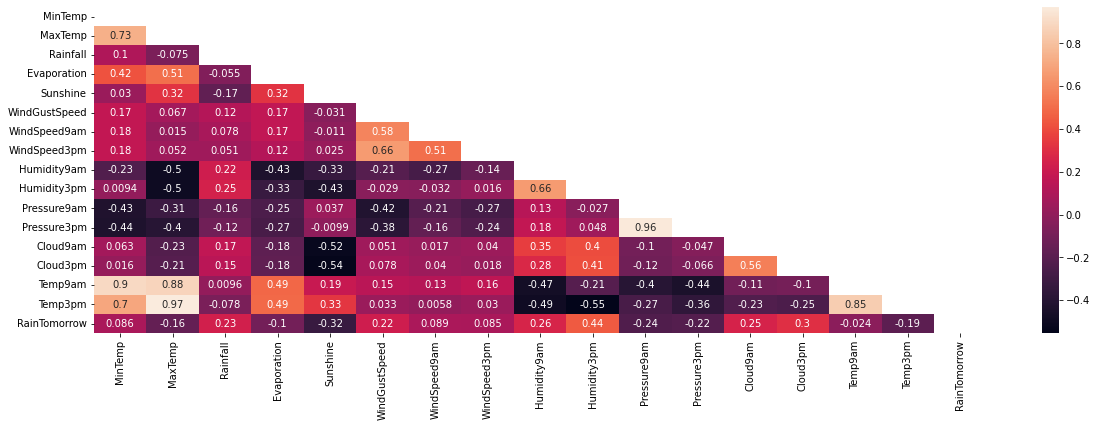

In [48]:
plt.figure(figsize=(20,6))
sns.heatmap(data_kor.corr(),annot=True, mask=np.triu(data_kor.corr()))

- Dari hasil visualisasi heatmap di atas dapat dilihat bahwa kolom yang memiliki korelasi paling tinggi terhadap kolom `RainTomorrow` adalah kolom `Humidity3pm` dan yang terkecil adalah kolom `Temp9am`
- Untuk kolom bertype catagorical yang digunakan hanya `RainyToday`, karena kolom `WindGustDir`, `WindDir9am`, dan `WindDir3pm` tidak berkaitan dengan apakah akan terjadinya hujan dikeesokan hari, sedangkan menurut sumber dari dataset hal yang menentukan apakah esok hari akan terjadi hujan atau tidaknya jika pada hari tersebut terjadi hujan >= 1mm
- Untuk kolom dengan korelasi semakin dekat dengan 0, maka akan dilakukan drop

In [49]:
num_col = X_train_handled.select_dtypes(include= np.number).columns.tolist()
cat_col = X_train_handled.select_dtypes(include=['object']).columns.tolist()

print('Kolom bertype numeric pada dataset :', num_col)
print('Kolom bertype catagorical pada dataset :', cat_col)

Kolom bertype numeric pada dataset : ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']
Kolom bertype catagorical pada dataset : ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']


In [50]:
X_train_handled.drop(['Temp9am', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'MinTemp', 'WindSpeed9am', 'WindSpeed3pm', 'MaxTemp', 'Temp3pm', 'Evaporation', 'Pressure9am', 'Pressure3pm'], axis = 1, inplace= True)
X_test.drop(['Temp9am', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'MinTemp', 'WindSpeed9am', 'WindSpeed3pm', 'MaxTemp', 'Temp3pm', 'Evaporation', 'Pressure9am', 'Pressure3pm'], axis = 1, inplace= True)

---
## Split between numerical and categorical columns


In [51]:
X_train_handled

,Rainfall,Sunshine,WindGustSpeed,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,RainToday
64921,0.2,7.5,72.0,64.0,22.0,1.000000,7.000000,No
118142,0.2,5.7,39.0,70.0,56.0,7.000000,4.000000,No
97442,0.0,10.1,24.0,82.0,53.0,6.000000,6.000000,No
49877,51.0,8.5,28.0,100.0,71.0,4.428381,4.500797,Yes
14534,0.2,8.5,72.0,65.0,36.0,2.000000,3.000000,No
...,...,...,...,...,...,...,...,...
70830,0.2,5.2,33.0,93.0,58.0,1.000000,4.000000,No
1726,0.0,8.5,50.0,56.0,31.0,4.428381,1.000000,No
35653,0.0,12.0,63.0,49.0,46.0,2.000000,3.000000,No
91256,9.4,6.4,39.0,71.0,69.0,6.000000,7.000000,Yes


In [52]:
# Get Numerical Columns and Categorical Columns

num_columns = X_train_handled.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train_handled.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns : ', num_columns)
print('Categorical Columns : ', cat_columns)

Numerical Columns :  ['Rainfall', 'Sunshine', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm', 'Cloud9am', 'Cloud3pm']
Categorical Columns :  ['RainToday']


In [53]:
# Split Train-Set and Test-Set based on Column Type (Numerical/Categorical)

X_train_num = X_train_handled[num_columns]
X_train_cat = X_train_handled[cat_columns]

X_test_num = X_test[num_columns]
X_test_cat = X_test[cat_columns]

---
## Feature Scaling

In [54]:
# Display X_train_num

X_train_num

,Rainfall,Sunshine,WindGustSpeed,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm
64921,0.2,7.5,72.0,64.0,22.0,1.000000,7.000000
118142,0.2,5.7,39.0,70.0,56.0,7.000000,4.000000
97442,0.0,10.1,24.0,82.0,53.0,6.000000,6.000000
49877,51.0,8.5,28.0,100.0,71.0,4.428381,4.500797
14534,0.2,8.5,72.0,65.0,36.0,2.000000,3.000000
...,...,...,...,...,...,...,...
70830,0.2,5.2,33.0,93.0,58.0,1.000000,4.000000
1726,0.0,8.5,50.0,56.0,31.0,4.428381,1.000000
35653,0.0,12.0,63.0,49.0,46.0,2.000000,3.000000
91256,9.4,6.4,39.0,71.0,69.0,6.000000,7.000000


In [55]:
# Feature Scaling using PowerTransformer

scaler = PowerTransformer()
scaler.fit(X_train_num)

X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

X_train_num_scaled

array([[ 0.01293228, -0.35377277,  2.12976149, ..., -1.46027457,
        -1.49177253,  1.21137469],
       [ 0.01293228, -1.00658707,  0.05160544, ...,  0.2402284 ,
         1.1405841 , -0.26982275],
       [-0.67211999,  0.78307259, -1.34582139, ...,  0.0962036 ,
         0.6860302 ,  0.7073709 ],
       ...,
       [-0.67211999,  1.75069214,  1.64495559, ..., -0.24348124,
        -1.07374338, -0.73967496],
       [ 1.87436602, -0.76627963,  0.05160544, ...,  0.85505341,
         0.6860302 ,  1.21137469],
       [-0.67211999,  1.12647097, -1.12936526, ..., -0.29245665,
        -0.01813975, -0.02944785]])

---
## Feature Encoding

In [56]:
# Display X_train_cat

X_train_cat

,RainToday
64921,No
118142,No
97442,No
49877,Yes
14534,No
...,...
70830,No
1726,No
35653,No
91256,Yes


In [57]:
# Feature Encoding using Ordinal Encoder

encoder = OneHotEncoder(handle_unknown='ignore', sparse= False)

X_train_cat_enc = encoder.fit_transform(X_train_cat)
X_test_cat_enc = encoder.transform(X_test_cat)
X_train_cat_enc

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]])

---
## Concat between Numerical Columns and Categorical Columns

In [58]:
# Concate Columns

X_train_final = np.concatenate([X_train_num_scaled, X_train_cat_enc], axis=1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat_enc], axis=1)
X_train_final

array([[ 0.01293228, -0.35377277,  2.12976149, ...,  1.21137469,
         1.        ,  0.        ],
       [ 0.01293228, -1.00658707,  0.05160544, ..., -0.26982275,
         1.        ,  0.        ],
       [-0.67211999,  0.78307259, -1.34582139, ...,  0.7073709 ,
         1.        ,  0.        ],
       ...,
       [-0.67211999,  1.75069214,  1.64495559, ..., -0.73967496,
         1.        ,  0.        ],
       [ 1.87436602, -0.76627963,  0.05160544, ...,  1.21137469,
         0.        ,  1.        ],
       [-0.67211999,  1.12647097, -1.12936526, ..., -0.02944785,
         1.        ,  0.        ]])

In [59]:
X_train_final.shape

(113140, 9)

# Model Definition

In [60]:
# Training using Logistic Regression

model_log_reg = LogisticRegression()

In [67]:
# Training using linierSVC

model_linier_svm = LinearSVC(loss='hinge', dual=True)

In [77]:
# Training using polynomials

model_poly = SVC(kernel='poly', degree=2, gamma='auto', coef0=1, C=5)

In [83]:
# Training using Radial kernel

model_radial = SVC(kernel='rbf', gamma=0.5, C=0.1)

# Model Training

In [61]:
# Train the Model

model_log_reg.fit(X_train_final, y_train_new)

LogisticRegression()

In [68]:

model_linier_svm.fit(X_train_final, y_train_new)

LinearSVC(loss='hinge')

In [78]:
model_poly.fit(X_train_final, y_train_new)

SVC(C=5, coef0=1, degree=2, gamma='auto', kernel='poly')

In [84]:
model_radial.fit(X_train_final, y_train_new)

SVC(C=0.1, gamma=0.5)

# Model Evaluation

In [69]:
# Get Prediction of Train-Set and Test-Set

y_pred_train_log = model_log_reg.predict(X_train_final)
y_pred_test_log = model_log_reg.predict(X_test_final)

In [71]:
y_pred_train_linier = model_linier_svm.predict(X_train_final)
y_pred_test_linier = model_linier_svm.predict(X_test_final)

In [86]:
y_pred_train_poly = model_poly.predict(X_train_final)
y_pred_test_poly = model_poly.predict(X_test_final)

In [87]:
y_pred_train_radial = model_radial.predict(X_train_final)
y_pred_test_radial = model_radial.predict(X_test_final)

In [70]:
# Evaluate Model using Classication report

print('Error - Train : ', classification_report(y_train_new, y_pred_train_log))
print('Error - Test  : ', classification_report(y_test, y_pred_test_log))

Error - Train :                precision    recall  f1-score   support

         0.0       0.86      0.94      0.90     87832
         1.0       0.70      0.46      0.56     25308

    accuracy                           0.84    113140
   macro avg       0.78      0.70      0.73    113140
weighted avg       0.82      0.84      0.82    113140

Error - Test  :                precision    recall  f1-score   support

         0.0       0.86      0.94      0.90     22040
         1.0       0.70      0.46      0.56      6398

    accuracy                           0.83     28438
   macro avg       0.78      0.70      0.73     28438
weighted avg       0.82      0.83      0.82     28438



In [72]:
print('Error - Train : ', classification_report(y_train_new, y_pred_train_linier))
print('Error - Test  : ', classification_report(y_test, y_pred_test_linier))

Error - Train :                precision    recall  f1-score   support

         0.0       0.86      0.95      0.90     87832
         1.0       0.72      0.44      0.55     25308

    accuracy                           0.84    113140
   macro avg       0.79      0.70      0.72    113140
weighted avg       0.82      0.84      0.82    113140

Error - Test  :                precision    recall  f1-score   support

         0.0       0.85      0.95      0.90     22040
         1.0       0.71      0.44      0.54      6398

    accuracy                           0.83     28438
   macro avg       0.78      0.69      0.72     28438
weighted avg       0.82      0.83      0.82     28438



In [88]:
print('Error - Train : ', classification_report(y_train_new, y_pred_train_poly))
print('Error - Test  : ', classification_report(y_test, y_pred_test_poly))

Error - Train :                precision    recall  f1-score   support

         0.0       0.85      0.96      0.90     87832
         1.0       0.76      0.40      0.52     25308

    accuracy                           0.84    113140
   macro avg       0.81      0.68      0.71    113140
weighted avg       0.83      0.84      0.82    113140

Error - Test  :                precision    recall  f1-score   support

         0.0       0.85      0.96      0.90     22040
         1.0       0.76      0.40      0.53      6398

    accuracy                           0.84     28438
   macro avg       0.80      0.68      0.71     28438
weighted avg       0.83      0.84      0.82     28438



In [89]:
print('Error - Train : ', classification_report(y_train_new, y_pred_train_radial))
print('Error - Test  : ', classification_report(y_test, y_pred_test_radial))

Error - Train :                precision    recall  f1-score   support

         0.0       0.85      0.96      0.90     87832
         1.0       0.76      0.43      0.55     25308

    accuracy                           0.84    113140
   macro avg       0.81      0.70      0.73    113140
weighted avg       0.83      0.84      0.83    113140

Error - Test  :                precision    recall  f1-score   support

         0.0       0.85      0.96      0.90     22040
         1.0       0.75      0.42      0.54      6398

    accuracy                           0.84     28438
   macro avg       0.80      0.69      0.72     28438
weighted avg       0.83      0.84      0.82     28438



Accuracy - Train Set  :  0.8354693300335867 

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.86      0.94      0.90     87832
         1.0       0.70      0.46      0.56     25308

    accuracy                           0.84    113140
   macro avg       0.78      0.70      0.73    113140
weighted avg       0.82      0.84      0.82    113140
 

Confusion Matrix      : 


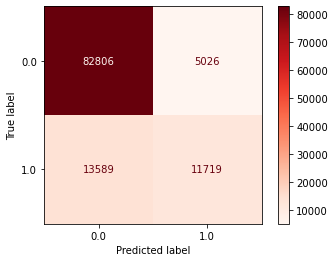

In [73]:
# Check Performance Model against Train-Set

y_pred_train_log = model_log_reg.predict(X_train_final)

print('Accuracy - Train Set  : ', accuracy_score(y_train_new, y_pred_train_log), '\n')
print('Classification Report : \n', classification_report(y_train_new, y_pred_train_log), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(model_log_reg, X_train_final, y_train_new, cmap='Reds'))

Accuracy - Train Set  :  0.8366360261622768 

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.86      0.95      0.90     87832
         1.0       0.72      0.44      0.55     25308

    accuracy                           0.84    113140
   macro avg       0.79      0.70      0.72    113140
weighted avg       0.82      0.84      0.82    113140
 

Confusion Matrix      : 


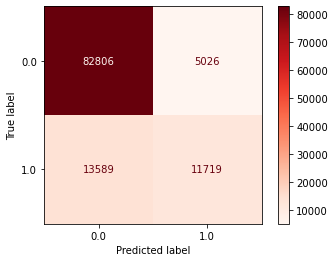

In [74]:
y_pred_train_linier = model_linier_svm.predict(X_train_final)

print('Accuracy - Train Set  : ', accuracy_score(y_train_new, y_pred_train_linier), '\n')
print('Classification Report : \n', classification_report(y_train_new, y_pred_train_linier), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(model_linier_svm, X_train_final, y_train_new, cmap='Reds'))

Accuracy - Train Set  :  0.8380678805020328 

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.85      0.96      0.90     87832
         1.0       0.76      0.40      0.52     25308

    accuracy                           0.84    113140
   macro avg       0.81      0.68      0.71    113140
weighted avg       0.83      0.84      0.82    113140
 

Confusion Matrix      : 


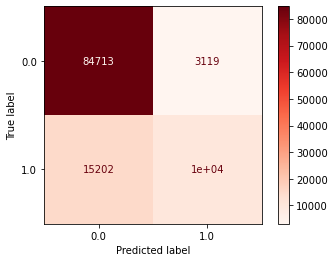

In [90]:
y_pred_train_poly = model_poly.predict(X_train_final)

print('Accuracy - Train Set  : ', accuracy_score(y_train_new, y_pred_train_poly), '\n')
print('Classification Report : \n', classification_report(y_train_new, y_pred_train_poly), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(model_poly, X_train_final, y_train_new, cmap='Reds'))

Accuracy - Train Set  :  0.8424076365564787 

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.85      0.96      0.90     87832
         1.0       0.76      0.43      0.55     25308

    accuracy                           0.84    113140
   macro avg       0.81      0.70      0.73    113140
weighted avg       0.83      0.84      0.83    113140
 

Confusion Matrix      : 


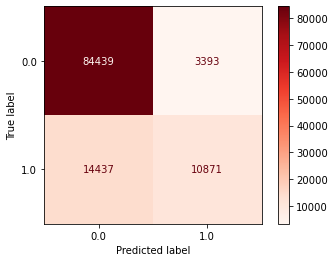

In [91]:
y_pred_train_radial = model_radial.predict(X_train_final)

print('Accuracy - Train Set  : ', accuracy_score(y_train_new, y_pred_train_radial), '\n')
print('Classification Report : \n', classification_report(y_train_new, y_pred_train_radial), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(model_radial, X_train_final, y_train_new, cmap='Reds'))

# Model Inference

In [93]:
# Display Inference-Set

data_inf_clear

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,10.8,16.5,2.4,2.6,5.8,NNW,41.0,E,SE,13.0,...,74.0,45.0,1013.5,1012.0,4.0,7.0,12.8,16.3,Yes,0.0
1,12.4,16.9,12.0,7.0,3.5,SSE,33.0,SE,SE,17.0,...,72.0,74.0,1020.5,1017.9,4.0,8.0,15.0,15.9,Yes,0.0
2,11.5,26.1,0.0,7.0,10.5,NNE,30.0,N,NE,2.0,...,68.0,44.0,1020.1,1016.4,1.0,1.0,20.9,24.7,No,0.0
3,15.3,21.2,0.0,6.6,7.3,E,50.0,E,ENE,30.0,...,59.0,67.0,1020.6,1018.6,6.0,7.0,20.0,18.7,No,0.0
4,5.4,18.5,0.0,3.0,6.5,SSE,30.0,N,ESE,4.0,...,78.0,43.0,1034.4,1029.2,7.0,3.0,7.5,17.8,No,0.0
5,16.9,27.5,2.4,3.8,10.8,E,24.0,SSE,E,9.0,...,58.0,62.0,1012.5,1010.5,4.0,7.0,24.9,25.4,Yes,1.0
6,16.6,26.9,0.0,4.6,10.4,ESE,39.0,SE,E,17.0,...,65.0,60.0,1015.0,1012.6,2.0,2.0,23.0,26.0,No,0.0


In [94]:
# Split between Numerical Columns and Categorical Columns

data_inf_num = data_inf_clear[num_columns]
data_inf_cat = data_inf_clear[cat_columns]

In [95]:
# Feature Scaling and Feature Encoding

data_inf_num_scaled = scaler.transform(data_inf_num)
data_inf_cat_enc = encoder.transform(data_inf_cat)

In [96]:
# Merge Numerical Data and Categorical Data

data_inf_final = np.concatenate([data_inf_num_scaled, data_inf_cat_enc], axis=1)

In [99]:
# Predict Inference-Set

y_pred_inf = model_radial.predict(data_inf_final)
y_pred_inf_df = pd.DataFrame(y_pred_inf, columns=['Rainy-prediction'])

In [101]:
# Concat Inference-Set with Prediction

pd.concat([data_inf_clear, y_pred_inf_df], axis=1)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Rainy-prediction
0,10.8,16.5,2.4,2.6,5.8,NNW,41.0,E,SE,13.0,...,45.0,1013.5,1012.0,4.0,7.0,12.8,16.3,Yes,0.0,0.0
1,12.4,16.9,12.0,7.0,3.5,SSE,33.0,SE,SE,17.0,...,74.0,1020.5,1017.9,4.0,8.0,15.0,15.9,Yes,0.0,1.0
2,11.5,26.1,0.0,7.0,10.5,NNE,30.0,N,NE,2.0,...,44.0,1020.1,1016.4,1.0,1.0,20.9,24.7,No,0.0,0.0
3,15.3,21.2,0.0,6.6,7.3,E,50.0,E,ENE,30.0,...,67.0,1020.6,1018.6,6.0,7.0,20.0,18.7,No,0.0,0.0
4,5.4,18.5,0.0,3.0,6.5,SSE,30.0,N,ESE,4.0,...,43.0,1034.4,1029.2,7.0,3.0,7.5,17.8,No,0.0,0.0
5,16.9,27.5,2.4,3.8,10.8,E,24.0,SSE,E,9.0,...,62.0,1012.5,1010.5,4.0,7.0,24.9,25.4,Yes,1.0,0.0
6,16.6,26.9,0.0,4.6,10.4,ESE,39.0,SE,E,17.0,...,60.0,1015.0,1012.6,2.0,2.0,23.0,26.0,No,0.0,0.0


# Pengambilan Kesimpulan

- Setelah dilakukan proses pemodelan pada dataset di atas didapati nilai akurasi :
    - pemodelan menggunakan Logistic Regression sebesar 0.8354693300335867 / 83.546%
    - pemodelan menggunakan linierSVC sebesar 0.8366360261622768 / 83.663%
    - pemodelan menggunakan Polynomials sebesar 0.8380678805020328 / 83.806%
    - pemodelan menggunakan Radial kernel sebesar 0.8424076365564787 / 84.240%
- Didapati nilai akurasi terbesar dengan menggunakan pemodelan menggunakan radial kernel
- Dari hasil pemodelan mungkin akan didapatkan hasil yang lebih baik jika menggunakan fitur scaling selain PowerTransformer